# Stock STARR Ratio Chart

https://www.franklintempleton.com/content-us/pdf/en-us/en-us-retail/active-views/PCT_TPSTR_0817.pdf

### STARR = (Rp - Rf) / ETL(%)
### Stable Tail-Adjusted Return Ratio
### ETL - Expected Tail Loss  

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = '^GSPC' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_returns = stocks['Adj Close'].pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [6]:
def starr_ratio(stock_returns, rf):
    etl = -0.10 # 99% confidence 
    sr = (stock_returns - rf) / etl
    return sr

Text(0, 0.5, 'STARR')

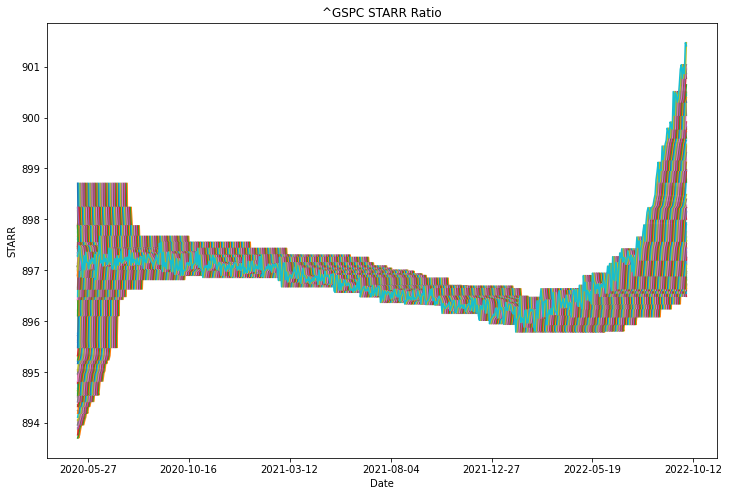

In [7]:
# Compute the running Alpha
running = [starr_ratio(stock_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stock_returns))]


# Plot running Alpha up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stock_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' STARR Ratio')
plt.xlabel('Date')
plt.ylabel('STARR')

In [8]:
starr_ratio(stock_returns, rf)

Date
2020-01-02 00:00:00-05:00           NaN
2020-01-03 00:00:00-05:00    893.911846
2020-01-06 00:00:00-05:00    893.708334
2020-01-07 00:00:00-05:00    893.771700
2020-01-08 00:00:00-05:00    893.890108
                                ...    
2023-02-22 00:00:00-05:00    913.967457
2023-02-23 00:00:00-05:00    914.197575
2023-02-24 00:00:00-05:00    914.455961
2023-02-27 00:00:00-05:00    914.419496
2023-02-28 00:00:00-05:00    914.580378
Name: Adj Close, Length: 795, dtype: float64

In [9]:
sr = starr_ratio(stock_returns, rf)

Text(0, 0.5, 'STARR Ratio')

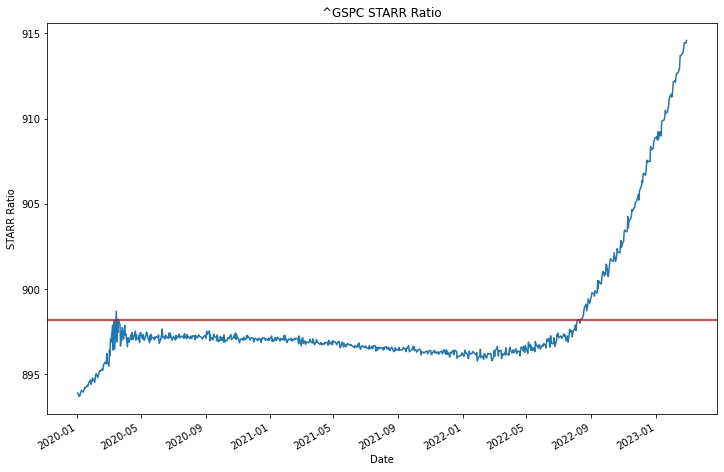

In [10]:
sr.plot(figsize=(12,8), title = symbol + ' STARR Ratio')
plt.axhline(y=sr.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('STARR Ratio')